# Coupled Oscillators

$
    \newcommand{\mqty}[1]{\left[ \begin{aligned}#1\end{aligned} \right]}
$
Consider a pair of identical oscillators (mass $m$, spring constant $k$) that are weakly coupled with $m\equiv m_1=m_2$). The equations of motion (EOM) for the oscillators, from Newton's second law (N2L), are
\begin{align*}
m \ddot{x}_1 &= - k x_1 -\varepsilon k (x_1-x_2)
\\
m \ddot{x}_2 &= - k x_2 -\varepsilon k (x_2-x_1)
\end{align*}
where $\varepsilon$ is a small quantity and the $x_i$ are measured from the equilibrium position (known as *equilibrium coordinate*). In the $\varepsilon\rightarrow 0$ limit we recover two uncoupled oscillators.

These EOM can be written in matrix form as
$$
    \mathbb{M}\ddot{\vec{x}} 
    = -\mathbb{K}\vec{x},
$$
where 
$
    \vec{x}
    \equiv
    \bigl[\begin{smallmatrix}
        x_1 \\ 
        x_2
    \end{smallmatrix} \bigr]
$
is a vector in *configuration space*, 
$
    \mathbb{M}
    =
    \bigl[\begin{smallmatrix}
        m & 0 \\ 
        0 & m
    \end{smallmatrix} \bigr]
$
is the *mass matrix* and $\mathbb{K}$ is the *spring matrix*.

In [3]:
# no need to change anything in this cell

%matplotlib inline
from math import pi
from scipy.integrate import odeint  # integrates a system of ODEs
import numpy as np
import matplotlib.pyplot as plt
# change some of the defaults for plots
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = [6,6]
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
from IPython.display import display, Markdown, Latex, Math, Pretty

#################### constants
eps = 0.1          # dimensionless coupling constant
m = 1              # unit of mass
w = 1              # unit of frequency
a = 1              # unit of length
#################### calculated constants
k = m * w**2       # spring constant
T = 2*pi/w         # the period
M = np.array( [ [m, 0], [0, m]  ] )

print( 'M = \n', M )

M = 
 [[1 0]
 [0 1]]


a) Use `numpy.linalg.eig()` to find and print out each eigenvalue followed by the corresponding eigenvector.



In [1]:
import numpy as np
#################### constants
eps = 0.1          # dimensionless coupling constant
m = 1              # unit of mass
w = 1              # unit of frequency
a = 1              # unit of length
#################### calculated constants
k = m * w*w      # spring constant
T = 2*np.pi/w         # the period
M = np.array( [ [m, 0], [0, m]  ] )
K = np.array( [ [-k*(1+eps), eps*k], [eps*k,-k*(1+eps)]])

evl,evc = np.linalg.eig(np.matmul(np.linalg.inv(M),K))
    
print ("v1:",evl[0],evc[0])
print ("v2:",evl[1],evc[1])

v1: -1.0 [ 0.70710678 -0.70710678]
v2: -1.2000000000000002 [0.70710678 0.70710678]


b) Use the *state vector* method (with $\vec{\psi}=[x_1,x_2,v_1,v_2]$) outlined in 
Appendix I and used in Example 2.2  to solve the coupled oscillator system from Example 2.3 using the initial conditions

* $\vec{\psi}(0) = [ {x_\circ}, {x_\circ}, 0, 0]$,
* $\vec{\psi}(0) = [ {x_\circ}, -{x_\circ}, 0, 0]$, and
* $\vec{\psi}(0) = [ x_\circ, 0, 0, 0]$.

Use `scipy.integrate.odeint()` to integrate the state vector for six periods of the uncoupled oscillators (ie, the period of the uncoupled oscillator is $T=2\pi/\omega=2\pi\sqrt{m/k}$). You will need to create a function that returns the time-derivative of the state-vector.

Plot your numerical results for the $x_1$ and $x_2$ as functions of time.
(Hint: For part (c) you can find the analytic result by considering the appropriate linear combination of the two *normal mode*.)


[0, 37.69911184307752, -1, 1]

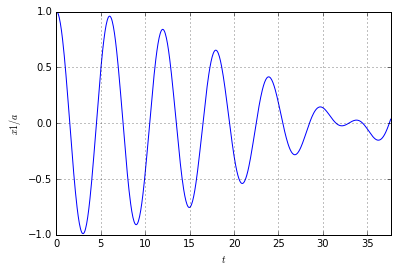

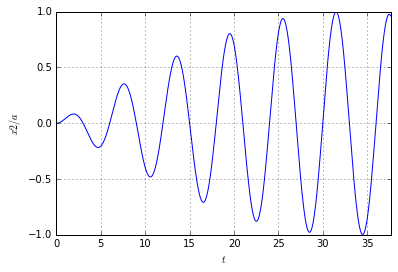

In [8]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
#################### constants
eps = 0.1          # dimensionless coupling constant
m = 1              # unit of mass
w = 1              # unit of frequency
a = 1              # unit of length
#################### calculated constants
k = m * w**2       # spring constant
T = 2*np.pi/w         # the period
#################### more constants
N = 100                         # number of time steps per period
n = 6                           # $n$ oscillations
tMax = n * T                    # maximum time
Dt = T / N                      # time step -- the subinterval length
t = np.arange( n*N ) * Dt       # time steps: $t=0,dt, 2dt, ... ,nT-dt$
x0, v0 = a, 0                   # initial conditions
psi00 = x0, x0, v0, v0          # the state vector at $t=0$, $\vec{\psi}(0)$
psi01 = x0, -1*x0, v0, v0
psi02 = x0, 0, v0, v0

################################# time derivative of the state vector
def psiPrime( psi, t ) :                  # returns $\dot{\vec{\psi}}$
    x1, x2, v1, v2 = psi                  # unpack $\vec{\psi}=[x,v]$
    a1 = (1/m)*(-k*x1 - eps*k*(x1-x2))        # $a=F/m=-\omega^2 x$
    a2 = (1/m)*(-k*x2 - eps*k*(x2-x1))        # $a=F/m=-\omega^2 x$
    psiDot = np.array( [v1, v2, a1, a2] ) # pack $\dot{\vec{\psi}}=[\dot{x},\dot{v}]$
    return psiDot

################################# calculate
x1, x2, v1, v2    = odeint( psiPrime, psi02, t ).T

################################# and plot
plt.figure()
plt.plot( t, x1/a)
# make it pretty
plt.xlabel( '$t$' )
plt.ylabel( '$x1/a$' )
plt.grid( 'on' )
plt.axis( [ 0, tMax, -1,1 ] )

plt.figure()
plt.plot( t, x2/a)
# make it pretty
plt.xlabel( '$t$' )
plt.ylabel( '$x2/a$' )
plt.grid( 'on' )
plt.axis( [ 0, tMax, -1,1 ] )


c) Repeat this problem but with the one of the masses twice as large as the other.

[0, 37.69911184307752, -1, 1]

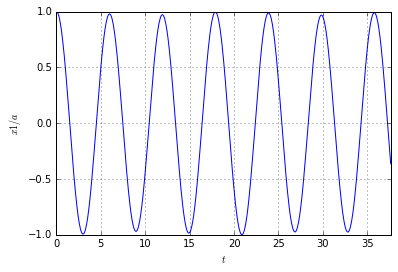

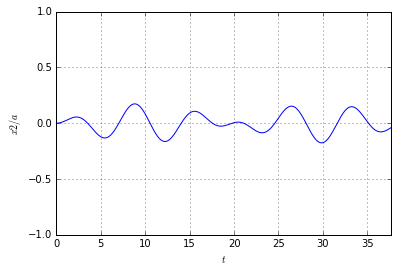

In [14]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#################### constants
eps = 0.1          # dimensionless coupling constant
m1 = 1              # unit of mass
m2 = 2*m1
w1 = 1              # unit of frequency
a = 1              # unit of length

#################### calculated constants
k1 = m1 * w**2        # spring constant
k2 = m2 * w**2        # spring constant (nvm)
T = 2*np.pi/w         # the period

N = 100                         # number of time steps per period
n = 6                           # $n$ oscillations
tMax = n * T                    # maximum time
Dt = T / N                      # time step -- the subinterval length
t = np.arange( n*N ) * Dt       # time steps: $t=0,dt, 2dt, ... ,nT-dt$
x0, v0 = a, 0                   # initial conditions
psi00 = x0, x0, v0, v0          # the state vector at $t=0$, $\vec{\psi}(0)$
psi01 = x0, -1*x0, v0, v0
psi02 = x0, 0, v0, v0

def psiPrime( psi, t ) :                  # returns $\dot{\vec{\psi}}$
    x1, x2, v1, v2 = psi                  # unpack $\vec{\psi}=[x,v]$
    a1 = (1/m1)*(-k1*x1 - eps*k1*(x1-x2))        # $a=F/m=-\omega^2 x$
    a2 = (1/m2)*(-k1*x2 - eps*k1*(x2-x1))        # $a=F/m=-\omega^2 x$
    psiDot = np.array( [v1, v2, a1, a2] ) # pack $\dot{\vec{\psi}}=[\dot{x},\dot{v}]$
    return psiDot

################################# calculate
x1, x2, v1, v2    = odeint( psiPrime, psi02, t ).T

################################# and plot
plt.figure()
plt.plot( t, x1/a)
# make it pretty
plt.xlabel( '$t$' )
plt.ylabel( '$x1/a$' )
plt.grid( 'on' )
plt.axis( [ 0, tMax, -1,1 ] )

plt.figure()
plt.plot( t, x2/a)
# make it pretty
plt.xlabel( '$t$' )
plt.ylabel( '$x2/a$' )
plt.grid( 'on' )
plt.axis( [ 0, tMax, -1,1 ] )
